<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%205/%20Exersize%206.%20Using%20line%20plots%20to%20examine%20trends%20in%20continuous%20variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load pandas, matplotlib and  the matplotlib dates and date formatting utilities:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
coviddaily = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/coviddaily720.csv", parse_dates=["casedate"])

In [2]:
# View a couple of rows of the Covid daily data:
coviddaily.sample(2, random_state=1).T

,2478,9526
iso_code,BRB,FRA
casedate,2020-06-11 00:00:00,2020-02-16 00:00:00
location,Barbados,France
continent,North America,Europe
new_cases,4,0
new_deaths,0,0
population,287371,6.52735e+07
pop_density,664.463,122.578
median_age,39.8,42
gdp_per_capita,16978.1,38605.7


In [3]:
# Calculate new cases and deaths by day.
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()

In [4]:
coviddailytotals.sample(7, random_state=1)

,casedate,new_cases,new_deaths
44,2020-03-16,12386.0,757.0
47,2020-03-19,20130.0,961.0
94,2020-05-05,77474.0,3998.0
78,2020-04-19,80127.0,6005.0
160,2020-07-10,228608.0,5441.0
11,2020-02-12,2033.0,97.0
117,2020-05-28,102619.0,5168.0


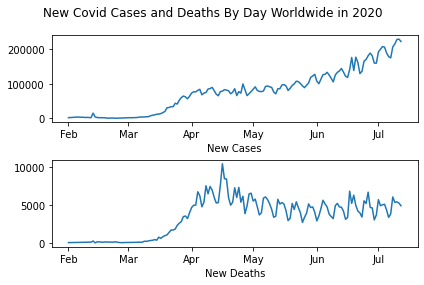

In [5]:
# Show line plots for new cases and new deaths by day.
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [6]:
# Calculate new cases and deaths by day and region:
regiontotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate','region'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()

regiontotals.sample(7, random_state=1)

,casedate,region,new_cases,new_deaths
1518,2020-05-16,North Africa,634.0,28.0
2410,2020-07-11,Central Asia,3873.0,26.0
870,2020-04-05,Western Europe,30090.0,4079.0
1894,2020-06-08,Western Europe,3712.0,180.0
790,2020-03-31,Western Europe,30180.0,2970.0
2270,2020-07-02,North Africa,2006.0,89.0
306,2020-02-26,Oceania / Aus,0.0,0.0


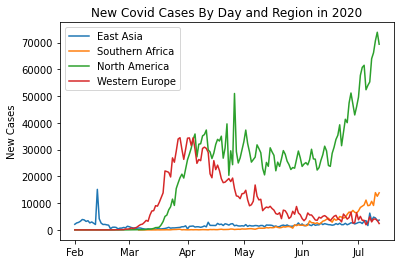

In [7]:
# Show line plots of new cases by selected regions.
showregions = ['East Asia','Southern Africa','North America',
    'Western Europe']

for j in range(len(showregions)):
  rt = regiontotals.loc[regiontotals.region==showregions[j],
                        ['casedate','new_cases']]
  plt.plot(rt.casedate, rt.new_cases, label=showregions[j])

plt.title("New Covid Cases By Day and Region in 2020")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

In [8]:
# take a closer look at the South Africa counts
af = regiontotals.loc[regiontotals.region=='Southern Africa',
  ['casedate','new_cases']].rename(columns={'new_cases':'afcases'})
sa = coviddaily.loc[coviddaily.location=='South Africa',
  ['casedate','new_cases']].rename(columns={'new_cases':'sacases'})
af = pd.merge(af, sa, left_on=['casedate'], right_on=['casedate'], how="left")
af.sacases.fillna(0, inplace=True)
af['afcasesnosa'] = af.afcases-af.sacases
afabb = af.loc[af.casedate.between('2020-04-01','2020-07-12')]

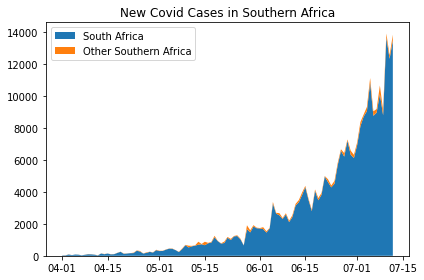

In [9]:
fig = plt.figure()
ax = plt.subplot()
ax.stackplot(afabb.casedate, afabb.sacases, afabb.afcasesnosa, labels=['South Africa','Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in Southern Africa")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()